<a href="https://colab.research.google.com/github/rezakhanahmadi342341/housing.csv/blob/main/second_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow import keras
import tensorflow
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np


In [ ]:
x = np.arange(-80, 90, 0.5)
y = x**2 + 5 * x -1
y.shape

(340,)

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2)

In [ ]:
model = keras.Sequential()
model.add(keras.layers.Dense(units=400, activation='relu', input_shape=[1]))
model.add(keras.layers.Dense(units=400, activation='relu'))
model.add(keras.layers.Dense(units=400, activation='relu'))
model.add(keras.layers.Dense(units=400, activation='relu'))
model.add(keras.layers.Dense(units=400, activation='relu'))
model.add(keras.layers.Dense(units=1,))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 400)                 │             800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 400)                 │         160,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 400)                 │         160,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 400)                 │         160,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 400)                 │         160,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │             401 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 642,801 (2.45 MB)

 Trainable params: 642,801 (2.45 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
earlystop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=200, restore_best_weights=True)
hist = model.fit(x_train, y_train,batch_size=64, epochs=1000, validation_data=(x_test, y_test), callbacks=earlystop)

Epoch 1/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 68ms/step - loss: 11272959.0000 - val_loss: 10605864.0000
Epoch 2/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 11097249.0000 - val_loss: 8421639.0000
Epoch 3/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 8241498.0000 - val_loss: 2158193.5000
Epoch 4/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 1869377.0000 - val_loss: 2306941.7500
Epoch 5/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 1678359.2500 - val_loss: 881009.9375
Epoch 6/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 1124214.7500 - val_loss: 1253733.8750
Epoch 7/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 1087701.5000 - val_loss: 637191.3750
Epoch 8/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 853770.0000 - val_loss: 764629.7500
Epoch 9/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 805229.0000 - val_loss: 651948.5000
Epoch 10/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 705415.7500 - val_loss: 637421.1250
Epoch 11/1000
5/5 ━━━━━━━━━━━━━━━━

In [8]:
pre = model.predict(x_test)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


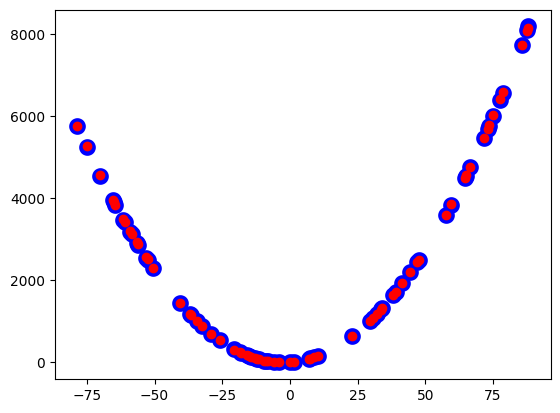

In [10]:
plt.scatter(x_test, y_test, color='blue', linewidths=6)
plt.scatter(x_test, pre, color='red')